In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from datetime import date, time, datetime, timedelta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Variáveis Meteorológicas CCA/MD.csv',
                   index_col = 0,header=0,decimal=",",sep = '[;]' ,error_bad_lines=False,engine = 'python')
#data.rename(columns={' W/m² Solar Radiation': 'Radiação Solar W/m²',
#                     ' mm Precipitation':'Precipitação mm',
 #                    ' Lightning Activity':'Lightning Activity',
  #                   ' mm/h Max Precip Rate':'Taxa de Precipitação mm/h'},
   #         inplace = True)
data.head()

<ipython-input-3-d53c9915e67a>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/My Drive/Variáveis Meteorológicas CCA/MD.csv',


,km Lightning Distance,° Wind Direction,m/s Wind Speed,m/s Gust Speed,°C Air Temperature,kPa Vapor Pressure,kPa Atmospheric Pressure,mm/h Max Precip Rate,°C RH Sensor Temp,kPa Reference Pressure,°C Logger Temperature
Timestamps,,,,,,,,,,,
2021-02-05 10:33:00,0,299,0.13,0.19,25.2,1.10,100.14,0.0,25.7,100.05,26.1
2021-02-05 10:34:00,0,297,0.13,0.24,24.8,1.11,100.14,0.0,25.5,100.06,26.1
2021-02-05 10:35:00,0,298,0.17,0.27,24.8,1.10,100.13,0.0,25.5,100.06,26.0
2021-02-05 10:36:00,0,321,0.13,0.25,24.9,1.11,100.14,0.0,25.5,100.06,26.0
2021-02-05 10:37:00,0,319,0.11,0.27,24.8,1.10,100.14,0.0,25.4,100.05,26.0


In [ ]:
data.index.unique()

Index(['2021-02-05 10:33:00', '2021-02-05 10:34:00', '2021-02-05 10:35:00',
       '2021-02-05 10:36:00', '2021-02-05 10:37:00', '2021-02-05 10:38:00',
       '2021-02-05 10:39:00', '2021-02-05 10:40:00', '2021-02-05 10:41:00',
       '2021-02-05 10:42:00',
       ...
       '2023-04-30 14:00:00', '2023-04-30 15:00:00', '2023-04-30 16:00:00',
       '2023-04-30 17:00:00', '2023-04-30 18:00:00', '2023-04-30 19:00:00',
       '2023-04-30 20:00:00', '2023-04-30 21:00:00', '2023-04-30 22:00:00',
       '2023-04-30 23:00:00'],
      dtype='object', name='Timestamps', length=442221)

In [ ]:
#data.index.names = ['Timestamps']
data.index = pd.to_datetime(data.index,  format = "%Y-%m-%d %H:%M:%S")
data.head()

,km Lightning Distance,° Wind Direction,m/s Wind Speed,m/s Gust Speed,°C Air Temperature,kPa Vapor Pressure,kPa Atmospheric Pressure,mm/h Max Precip Rate,°C RH Sensor Temp,kPa Reference Pressure,°C Logger Temperature
Timestamps,,,,,,,,,,,
2021-02-05 10:33:00,0,299,0.13,0.19,25.2,1.10,100.14,0.0,25.7,100.05,26.1
2021-02-05 10:34:00,0,297,0.13,0.24,24.8,1.11,100.14,0.0,25.5,100.06,26.1
2021-02-05 10:35:00,0,298,0.17,0.27,24.8,1.10,100.13,0.0,25.5,100.06,26.0
2021-02-05 10:36:00,0,321,0.13,0.25,24.9,1.11,100.14,0.0,25.5,100.06,26.0
2021-02-05 10:37:00,0,319,0.11,0.27,24.8,1.10,100.14,0.0,25.4,100.05,26.0


In [ ]:
minAC = data.resample('M').max()   #CÓDIGO PARA MINIMAS E MAXIMAS

In [ ]:
minAC.head()

,km Lightning Distance,° Wind Direction,m/s Wind Speed,m/s Gust Speed,°C Air Temperature,kPa Vapor Pressure,kPa Atmospheric Pressure,mm/h Max Precip Rate
Timestamps,,,,,,,,
2021-02-05,0.0,0,0.07,0.08,24.2,1.06,99.63,0.0
2021-02-06,0.0,0,0.09,0.11,22.8,1.88,99.90,0.0
2021-02-07,0.0,0,0.04,0.07,23.3,1.79,99.88,0.0
2021-02-08,0.0,0,0.14,0.21,22.6,1.77,99.73,0.0
2021-02-09,0.0,0,0.06,0.07,22.8,1.73,99.80,0.0


**Acumulativo**
Radiações e Precipitação





In [ ]:
diariaAC = data.resample('d').mean()

In [ ]:
menorponto=90/8
32*menorponto

360.0

In [ ]:
def condition(var):

    if var == "NA":
        return "NA"
    if (360-menorponto) <= var <= menorponto:
        return "N"
    if menorponto <= var <= (3*menorponto):
        return "NNE"
    if (3*menorponto) <= var <= (5*menorponto):
        return "NE"
    if (5*menorponto) <= var <= (7*menorponto):
        return "LNE"
    if (7*menorponto) <= var <= (9*menorponto):
        return "L"
    if (9*menorponto) <= var <= (11*menorponto):
        return "LSE"
    if (11*menorponto) <= var <= (13*menorponto):
        return "SE"
    if (13*menorponto) <= var <= (15*menorponto):
        return "SSE"
    if (15*menorponto) <= var <= (17*menorponto):
        return "S"
    if (17*menorponto) <= var <= (19*menorponto):
        return "SSO"
    if (19*menorponto) <= var <= (21*menorponto):
        return "SO"
    if (21*menorponto) <= var <= (23*menorponto):
        return "OSO"
    if (23*menorponto) <= var <= (25*menorponto):
        return "O"
    if (25*menorponto) <= var <= (27*menorponto):
        return "ONO"
    if (27*menorponto) <= var <= (29*menorponto):
        return "NO"
    if (29*menorponto) <= var <= (31*menorponto):
        return "NNO"


diariaAC["DireçãodoVentoD"] = diariaAC["° Wind Direction"].apply(condition)
diariaAC.head()

,km Lightning Distance,° Wind Direction,m/s Wind Speed,m/s Gust Speed,°C Air Temperature,kPa Vapor Pressure,kPa Atmospheric Pressure,mm/h Max Precip Rate,°C RH Sensor Temp,kPa Reference Pressure,°C Logger Temperature,DireçãodoVentoD
Timestamps,,,,,,,,,,,,
2021-02-05,0.000000,267.662500,0.926687,1.334825,29.553750,2.907425,99.950412,0.000000,30.640125,99.819188,30.280750,O
2021-02-06,0.134722,175.907639,0.896917,1.267007,25.690625,3.047861,100.149167,0.330764,26.322292,100.007417,26.175139,S
2021-02-07,0.018750,216.112500,3.645181,4.641736,25.279653,3.049167,100.172500,1.326667,25.815764,100.028097,25.724722,SO
2021-02-08,0.000000,246.290972,0.737056,1.002778,25.521319,3.033889,100.076708,0.065833,26.353472,99.929611,26.195833,OSO
2021-02-09,0.143750,232.843750,0.782889,1.171132,25.948194,2.997375,100.069264,0.698194,26.730486,99.928847,26.500625,SO


In [ ]:

name = 'acumulativoDiarioManaus.xlsx'
#diariaAC["Rosa dos Ventos"] =
diariaAC.head(15)

<ipython-input-6-0ffdb72f750c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diariaAC = data.resample('d').mean()


,km Lightning Distance,°C Air Temperature,kPa Vapor Pressure,kPa Atmospheric Pressure,mm/h Max Precip Rate
Timestamps,,,,,
2021-02-05,0.000000,29.553750,2.907425,99.950412,0.000000
2021-02-06,0.134722,25.690625,3.047861,100.149167,0.330764
2021-02-07,0.018750,25.279653,3.049167,100.172500,1.326667
2021-02-08,0.000000,25.521319,3.033889,100.076708,0.065833
2021-02-09,0.143750,25.948194,2.997375,100.069264,0.698194
2021-02-10,0.000000,26.424167,2.942590,100.000563,0.156181
2021-02-11,0.013889,26.364167,2.985806,99.993660,0.047708
2021-02-12,0.000000,25.382431,3.004417,100.019000,0.231806
2021-02-13,0.035417,24.672708,3.033410,100.043854,1.480833


In [ ]:
diariaAC.head(24)

,km Lightning Distance,°C Air Temperature,kPa Vapor Pressure,kPa Atmospheric Pressure,mm/h Max Precip Rate
Timestamps,,,,,
2021-02-05,0.000000,29.553750,2.907425,99.950412,0.000000
2021-02-06,0.134722,25.690625,3.047861,100.149167,0.330764
2021-02-07,0.018750,25.279653,3.049167,100.172500,1.326667
2021-02-08,0.000000,25.521319,3.033889,100.076708,0.065833
2021-02-09,0.143750,25.948194,2.997375,100.069264,0.698194
2021-02-10,0.000000,26.424167,2.942590,100.000563,0.156181
2021-02-11,0.013889,26.364167,2.985806,99.993660,0.047708
2021-02-12,0.000000,25.382431,3.004417,100.019000,0.231806
2021-02-13,0.035417,24.672708,3.033410,100.043854,1.480833


In [ ]:
name = 'mediaDiariaManaus.xlsx'
#salvando pra excel
diariaAC.to_excel(name)
mensal = data.resample('M',loffset=False).mean() #loffset=False?
mensal["DireçãodoVentoD"] = mensal["° Wind Direction"].apply(condition)
diariaAC.head()
mensal.to_excel('mediaMensalManaus.xlsx')
anual = data.resample('y').mean() #Média
anual["DireçãodoVentoD"] = anual["° Wind Direction"].apply(condition)
anual.to_excel('mediaAnualManaus.xlsx')
anual.index=["fev-dez 2021","fev-dez 2022","jan-mar 2023"]
mensal.head()
mensal.index=["fev 2021","mar 2021","abr 2021","mai 2021","jun 2021","jul 2021","ago 2021","set 2021","out 2021","nov 2021","dez 2021","jan 2022","fev 2022","mar 2022","abr 2022","mai 2022","jun 2022","jul 2022","ago 2022","set 2022","out 2022","nov 2022","dez 2022","jan 2022","fev 2022","mar 2022","abr 2022"]# REVER quando pegar tudo!

<ipython-input-28-29432dbfef90>:4: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  mensal = data.resample('M',loffset=False).mean() #loffset=False?


In [ ]:
anual.head()

,km Lightning Distance,° Wind Direction,m/s Wind Speed,m/s Gust Speed,°C Air Temperature,kPa Vapor Pressure,kPa Atmospheric Pressure,mm/h Max Precip Rate,°C RH Sensor Temp,kPa Reference Pressure,°C Logger Temperature,DireçãodoVentoD
fev-dez 2021,0.055913,129.787143,0.914173,1.245898,26.706694,3.052949,100.210170,0.314074,27.627589,100.081431,27.500434,SE
fev-dez 2022,0.233252,112.709626,1.015928,1.819715,26.092794,3.109621,100.119200,0.652208,26.809459,100.009565,26.875284,LSE
jan-mar 2023,0.658333,116.475000,1.038128,2.383913,25.799583,3.166199,100.169927,1.148264,26.462222,100.053493,26.610312,LSE


In [ ]:
mensal.head(50)

,km Lightning Distance,° Wind Direction,m/s Wind Speed,m/s Gust Speed,°C Air Temperature,kPa Vapor Pressure,kPa Atmospheric Pressure,mm/h Max Precip Rate,°C RH Sensor Temp,kPa Reference Pressure,°C Logger Temperature,DireçãodoVentoD
fev 2021,0.027476,204.006810,1.016852,1.429706,25.823485,2.969940,100.090294,0.576916,26.569272,99.959493,26.340489,SSO
mar 2021,0.043167,131.772698,0.881278,1.204576,25.412247,3.007420,100.149109,0.576813,26.172006,100.018059,26.017318,SE
abr 2021,0.031527,114.597579,0.909159,1.207962,26.320835,3.119164,100.143108,0.298229,27.258089,100.008465,27.082820,LSE
mai 2021,0.027643,111.666017,0.888911,1.187313,26.655421,3.164825,100.258669,0.241006,27.574948,100.126444,27.420641,LSE
jun 2021,0.047754,124.053216,0.898442,1.215065,26.508611,3.065981,100.327773,0.299322,27.507835,100.194224,27.356126,SE
jul 2021,0.035596,124.423096,0.859588,1.170917,26.696494,2.960213,100.420562,0.205022,27.764684,100.284761,27.640896,SE
ago 2021,0.055018,132.488374,0.877170,1.225120,27.632872,2.997581,100.269282,0.218069,28.693441,100.138987,28.573268,SE
set 2021,0.097051,125.506575,0.915268,1.234110,27.445972,3.048091,100.232641,0.076247,28.392784,100.106859,28.319262,SE
out 2021,0.071755,131.290110,0.943629,1.295261,27.730102,3.075527,100.084043,0.312232,28.646867,99.972363,28.573945,SE
nov 2021,0.142987,107.028597,1.004284,1.354680,26.629782,3.123149,100.039341,0.428656,27.394368,99.920687,27.390273,LSE


KeyError: ignored

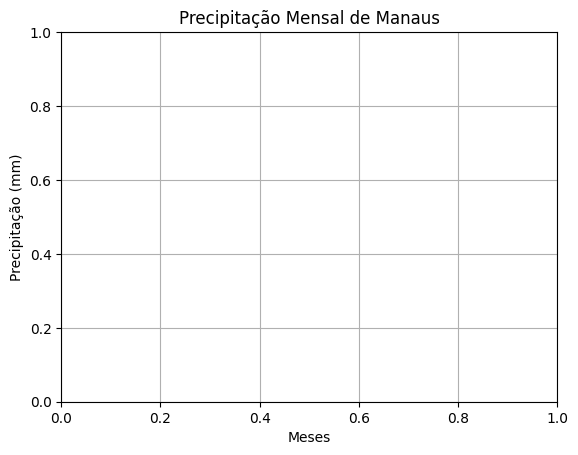

In [ ]:
plt.title('Precipitação Mensal de Manaus')
plt.xlabel('Meses')
plt.ylabel('Precipitação (mm)')
plt.grid()
plt.plot(mensal["Precipitação"])
plt.savefig('ManausprecipitaçãoM.png')

In [ ]:
plt.title('Precipitação Diária de Manaus')
plt.xlabel('Dias')
plt.ylabel('Precipitação (mm)')
plt.grid()
plt.plot(diariaAC["Precipitação"])
plt.savefig('ManausprecipitaçãoD.png')

In [ ]:
plt.title('Precipitação Anual de Manaus')
plt.xlabel('Anos')
plt.ylabel('Precipitação (mm)')
plt.grid()
plt.plot(anual["Precipitação"])#ACHAR GRÁFICO ADEQUADO
plt.savefig('ManausprecipitaçãoA.png')

In [ ]:
np.std(mensal)

 km Lightning Distance       0.275531
 °C Air Temperature          0.975892
 kPa Vapor Pressure          0.066547
 kPa Atmospheric Pressure    0.094779
 mm/h Max Precip Rate        0.597315
dtype: float64

In [ ]:
d = diariaAC.dropna()